In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


In [30]:
df_main = pd.read_csv('Crawl/Data/Perfume_Data2.csv')
df_main.head()

,sothutu,name,brand,pricenew,sale,priceold
0,0,Nước Hoa Nữ Diamond Femme 45ml (Trắng),Eau De Parfum,301000.0,45%,549000.0
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh ...,Inner Perfume #Eau De Bijou,144000.0,59%,350000.0
2,2,Nước Hoa Nữ Diamond Femme Pink 45ml (Hồng),Eau De Parfum,275000.0,50%,549000.0
3,3,Nước Hoa Nam Diamond Homme 45ml (Đen),Eau De Parfum,275000.0,50%,549000.0
4,4,Nước Hoa Nữ Diamond Femme Ruby Red 45ml (Đỏ),Eau De Parfum,301000.0,45%,549000.0


In [31]:
print(df_main.shape)

(451, 6)


In [32]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sothutu   451 non-null    int64  
 1   name      451 non-null    object 
 2   brand     387 non-null    object 
 3   pricenew  451 non-null    float64
 4   sale      451 non-null    object 
 5   priceold  451 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


In [33]:
df_main.describe()

,sothutu,pricenew,priceold
count,451.000000,4.510000e+02,4.510000e+02
mean,225.000000,1.558745e+06,1.950182e+06
std,130.336743,1.703503e+06,2.065129e+06
min,0.000000,4.400000e+04,6.900000e+04
25%,112.500000,2.055000e+05,3.120000e+05
50%,225.000000,4.960000e+05,7.000000e+05
75%,337.500000,2.811000e+06,3.456500e+06
max,450.000000,7.866000e+06,9.980000e+06


In [34]:
print(df_main.isna().sum())

sothutu      0
name         0
brand       64
pricenew     0
sale         0
priceold     0
dtype: int64


In [35]:
# Xử lý cột 'sale' để chuyển đổi thành phần trăm giảm giá
# Loại bỏ ký hiệu phần trăm và các ký tự không mong muốn
df_main['sale'] = df_main['sale'].str.replace('%', '').str.replace('(', '').str.replace(')', '').str.replace('-', '')


In [36]:
# Chuyển đổi giá trị thành số thực
df_main['discount_percent'] = pd.to_numeric(df_main['sale'], errors='coerce')


In [37]:
# Đổi tên cột cho phù hợp với ngữ cảnh
df_main.rename(columns={'name': 'Tên_Sản_Phẩm', 'brand': 'Thương_Hiệu', 'pricenew': 'Giá_Bán', 'priceold': 'Giá_Gốc', 'discount_percent': 'Phần_Trăm_Giảm'}, inplace=True)


In [38]:
# Loại bỏ các cột không cần thiết
df_main.drop(columns=['sale'], inplace=True)


In [39]:
# Hiển thị dataframe đã được chỉnh sửa
df_main.head()

,sothutu,Tên_Sản_Phẩm,Thương_Hiệu,Giá_Bán,Giá_Gốc,Phần_Trăm_Giảm
0,0,Nước Hoa Nữ Diamond Femme 45ml (Trắng),Eau De Parfum,301000.0,549000.0,45
1,1,Nước Hoa Vùng Kín Foellie Hương Hoa Hồng Mạnh ...,Inner Perfume #Eau De Bijou,144000.0,350000.0,59
2,2,Nước Hoa Nữ Diamond Femme Pink 45ml (Hồng),Eau De Parfum,275000.0,549000.0,50
3,3,Nước Hoa Nam Diamond Homme 45ml (Đen),Eau De Parfum,275000.0,549000.0,50
4,4,Nước Hoa Nữ Diamond Femme Ruby Red 45ml (Đỏ),Eau De Parfum,301000.0,549000.0,45


In [40]:
# Phân tích dữ liệu thăm dò (EDA)
# Định nghĩa các cột phân loại để trực quan hóa
cat_cols = ['Thương_Hiệu']

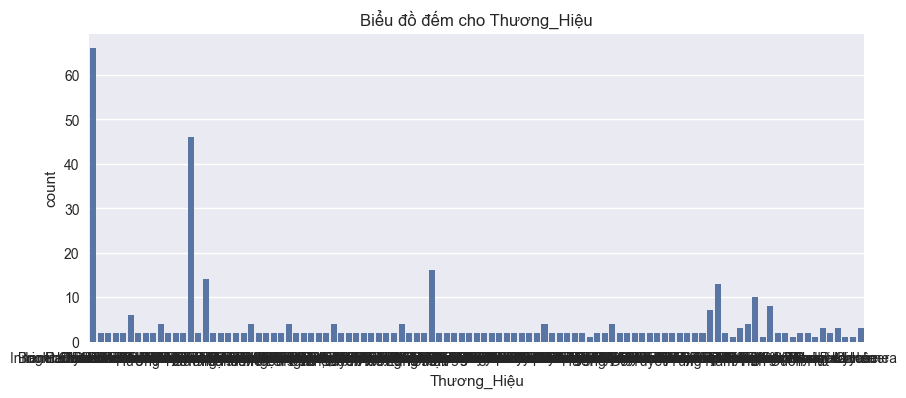

In [41]:
# Vẽ biểu đồ đếm cho các cột phân loại
for col in cat_cols:
    plt.figure(figsize=[10, 4])
    sns.countplot(x=col, data=df_main)
    plt.title(f'Biểu đồ đếm cho {col}')
    plt.show()

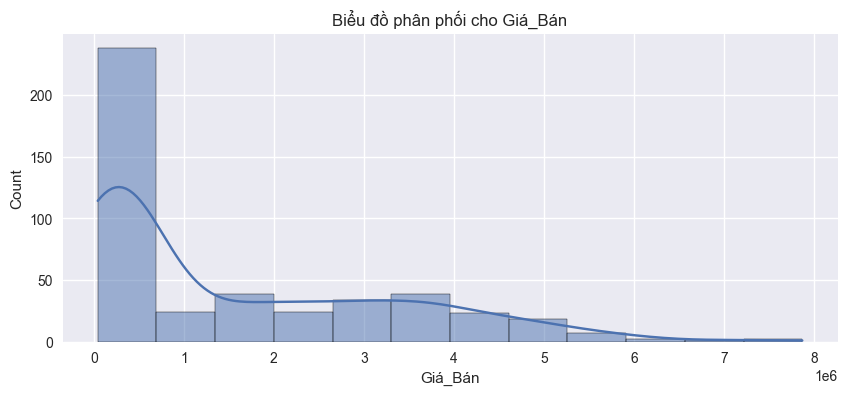

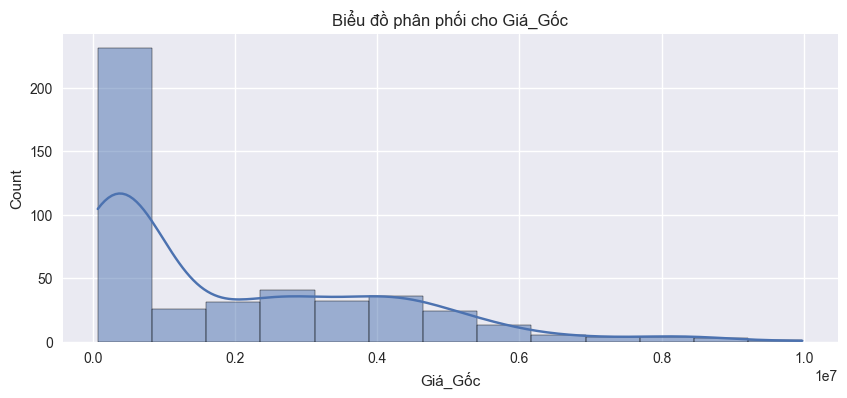

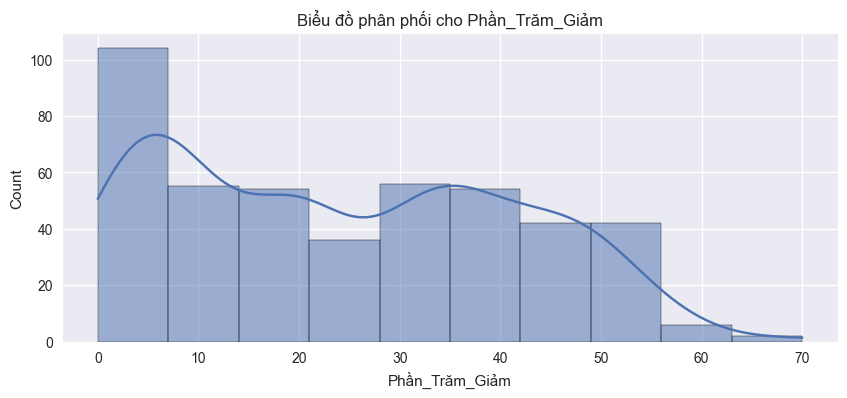

In [42]:
# Nếu bạn có các cột số liệu muốn phân tích, bạn có thể vẽ biểu đồ phân phối
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
for col in num_cols:
    plt.figure(figsize=[10, 4])
    sns.histplot(df_main[col], kde=True)
    plt.title(f'Biểu đồ phân phối cho {col}')
    plt.show()

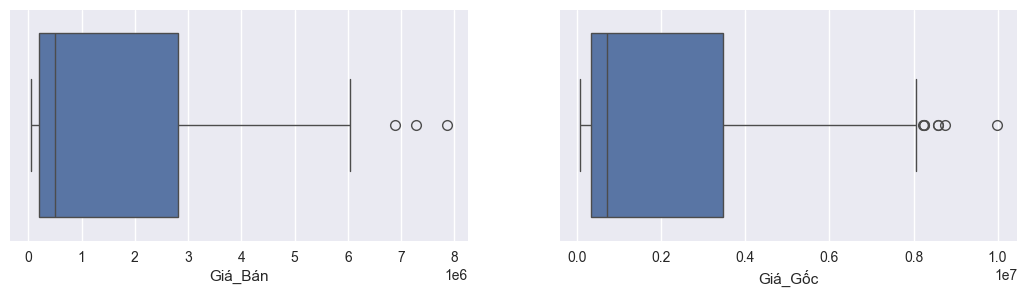

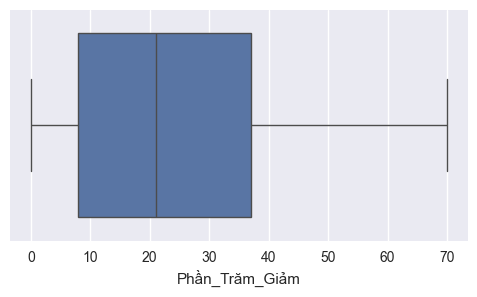

In [43]:
# Định nghĩa các cột số liệu để phân tích
num_cols = ['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']
i = 0
while i < len(num_cols):
    fig = plt.figure(figsize=[13, 3])
    
    # Vẽ biểu đồ boxplot cho từng cột
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    if i < len(num_cols):  # Kiểm tra để tránh vượt quá danh sách các cột
        plt.subplot(1, 2, 2)
        sns.boxplot(x=num_cols[i], data=df_main)
        i += 1
    
    plt.show()

In [44]:
# Hiển thị các hàng có giá bán cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Bán'] > df_main['Giá_Bán'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
292      292  Nước Hoa Nam Paco Rabanne 1 Million Parfum EDP...   
368      368    Nước Hoa Nữ Narciso Rodriguez For Her EDP 200ml   
372      372  Nước Hoa Nữ Narciso Rodriguez Pure Musc For He...   
375      375  Nước Hoa Nữ Carolina Herrera Very Good Girl Gl...   
413      413                 Nước Hoa Nữ Burberry Her EDP 200ml   

                           Thương_Hiệu    Giá_Bán    Giá_Gốc  Phần_Trăm_Giảm  
292               1 Million Parfum EDP  6048000.0  6720000.0              10  
368                      Eau De Parfum  6894000.0  7660000.0              10  
372                      Eau De Parfum  7274000.0  7660000.0               5  
375  Very Good Girl Glam Eau De Parfum  7866000.0  8740000.0              10  
413                  Her Eau De Parfum  5934000.0  9980000.0              41  


In [45]:

# Hiển thị các hàng có giá gốc cao hơn ngưỡng 99%
print(df_main[df_main['Giá_Gốc'] > df_main['Giá_Gốc'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
375      375  Nước Hoa Nữ Carolina Herrera Very Good Girl Gl...   
406      406                 Nước Hoa Nữ Chloé Nomade EDP 150ml   
413      413                 Nước Hoa Nữ Burberry Her EDP 200ml   
426      426              Nước Hoa Nữ Chloé Eau De Parfum 150ml   

                           Thương_Hiệu    Giá_Bán    Giá_Gốc  Phần_Trăm_Giảm  
375  Very Good Girl Glam Eau De Parfum  7866000.0  8740000.0              10  
406                      Eau De Parfum  5864000.0  8580000.0              32  
413                  Her Eau De Parfum  5934000.0  9980000.0              41  
426                                NaN  5686000.0  8580000.0              34  


In [46]:
# Hiển thị các hàng có phần trăm giảm giá cao hơn ngưỡng 99%
print(df_main[df_main['Phần_Trăm_Giảm'] > df_main['Phần_Trăm_Giảm'].quantile(0.99)])


     sothutu                                       Tên_Sản_Phẩm  \
181      181  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   
441      441  [HSD 07/2024] Nước Hoa Nữ Trussardi Sound Of D...   

                            Thương_Hiệu    Giá_Bán    Giá_Gốc  Phần_Trăm_Giảm  
181  Sound Of Donna Eau De Parfum Spray   726000.0  2420000.0              70  
441  Sound Of Donna Eau De Parfum Spray  1452000.0  4840000.0              70  


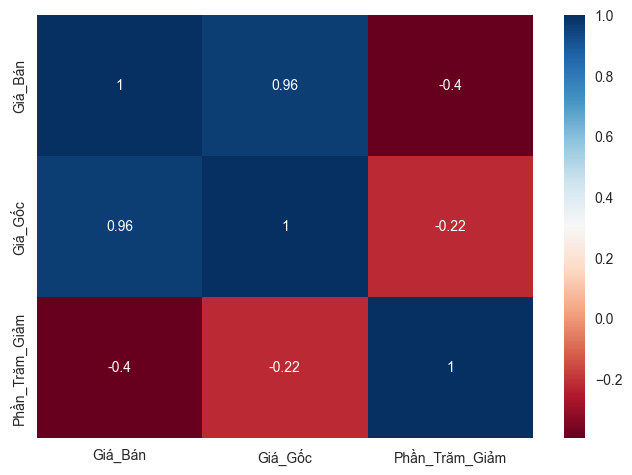

Giá_Bán           1.000000
Giá_Gốc           0.963162
Phần_Trăm_Giảm   -0.396136
Name: Giá_Bán, dtype: float64


In [47]:
# Lọc các cột số liệu
numeric_df = df_main[['Giá_Bán', 'Giá_Gốc', 'Phần_Trăm_Giảm']]

# Vẽ biểu đồ heatmap để hiển thị tương quan giữa các biến
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

# Hiển thị tương quan của cột 'Giá_Bán' với các cột khác
print(numeric_df.corr()['Giá_Bán'])


In [48]:
# Thay thế NaN trong cột 'Thương_Hiệu' bằng 'Elite Perfume'
df_main['Thương_Hiệu'].fillna('Elite Perfume', inplace=True)
df_main['Phần_Trăm_Giảm'] = df_main['Phần_Trăm_Giảm'].fillna(0.0)
df_main.loc[df_main['Phần_Trăm_Giảm'] == 0.0, 'Giá_Gốc'] = df_main['Giá_Bán']

df_main = df_main.drop(columns=['Tên_Sản_Phẩm'])  # Loại bỏ các cột không cần thiết
X = df_main.drop(columns=['Giá_Bán'])  # Biến đầu vào
y = df_main['Giá_Bán']  # Biến mục tiêu




In [49]:
df_main.head()


,sothutu,Thương_Hiệu,Giá_Bán,Giá_Gốc,Phần_Trăm_Giảm
0,0,Eau De Parfum,301000.0,549000.0,45
1,1,Inner Perfume #Eau De Bijou,144000.0,350000.0,59
2,2,Eau De Parfum,275000.0,549000.0,50
3,3,Eau De Parfum,275000.0,549000.0,50
4,4,Eau De Parfum,301000.0,549000.0,45


In [50]:
# Chuyển đổi các biến phân loại thành biến số (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CV = []
R2_train = []
R2_test = []

In [51]:
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (360, 106)
X_test shape: (91, 106)
y_train shape: (360,)
y_test shape: (91,)


In [52]:
def perfume_pred_model(model, model_name):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
            
    # R2 score của tập huấn luyện
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # R2 score của tập kiểm tra
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # R2 mean của tập huấn luyện sử dụng Cross validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # In kết quả
    print("Train R2-score:", round(R2_train_model, 2))
    print("Test R2-score:", round(R2_test_model, 2))
    print("Train CV scores:", cross_val)
    print("Train CV mean:", round(cv_mean, 2))
    
    # Vẽ đồ thị
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Residual Plot của dữ liệu huấn luyện
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train - y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Đồ thị scatter giữa y_test và y_pred_test
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()



Train R2-score: 0.99
Test R2-score: 0.95
Train CV scores: [0.92751724 0.9713571  0.95986132 0.98276758 0.95114124]
Train CV mean: 0.96


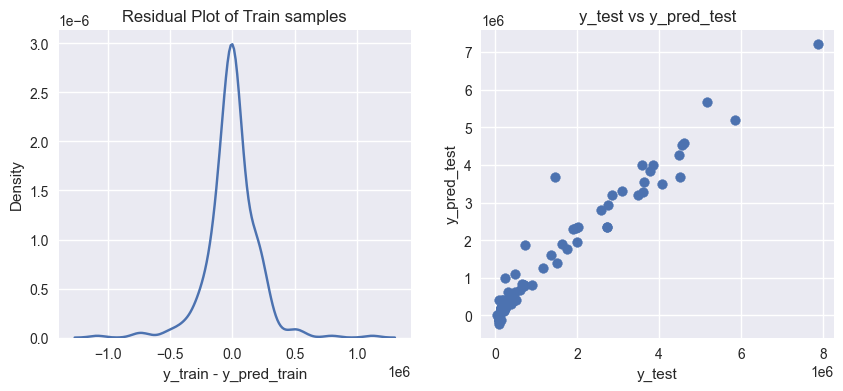

Mean Absolute Error: 208716.8217507161
Mean Squared Error: 130504322159.70296
Root Mean Squared Error: 361253.81957801216
     Giá_Ban_Dau   Gia_Du_Doan
298     382000.0  3.174984e+05
39       84000.0 -1.120761e+05
335     268000.0  2.660771e+05
398    4510000.0  3.686608e+06
153    1989000.0  1.962102e+06
195    2593000.0  2.809210e+06
168    1509000.0  1.404474e+06
101    1746000.0  1.773107e+06
397      88000.0 -1.197742e+05
30      134000.0  2.022100e+05
72      134000.0  1.931835e+05
271     268000.0  2.366662e+05
140     319000.0  6.311003e+05
349     196000.0  3.972306e+05
362    3492000.0  3.202631e+06
55      191000.0  2.555016e+05
165    2843000.0  3.202006e+06
320     218000.0  1.654955e+05
287     268000.0  2.763932e+05
82      160000.0  1.084998e+05
77       54000.0  1.775193e+04
132     354000.0  4.219681e+05
248    4550000.0  4.522834e+06
117     899000.0  8.130599e+05
203    2745000.0  2.921186e+06
404    5178000.0  5.679841e+06
79      380000.0  5.255263e+05
441    145

In [53]:
# Khởi tạo mô hình Linear Regression
linear_reg = LinearRegression()
perfume_pred_model(linear_reg, "linear.pkl")
# Huấn luyện mô hình
linear_reg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = linear_reg.predict(X_test)

# Kiểm thử mô hình
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# So sánh giá ban đầu với giá mô hình dự đoán
comparison_df = pd.DataFrame({'Giá_Ban_Dau': y_test, 'Gia_Du_Doan': y_pred_test})
print(comparison_df)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Ridge Regression: {'alpha': 1}
Train R2-score: 0.98
Test R2-score: 0.96
Train CV scores: [0.96811911 0.98267346 0.97195039 0.98248888 0.9606802 ]
Train CV mean: 0.97


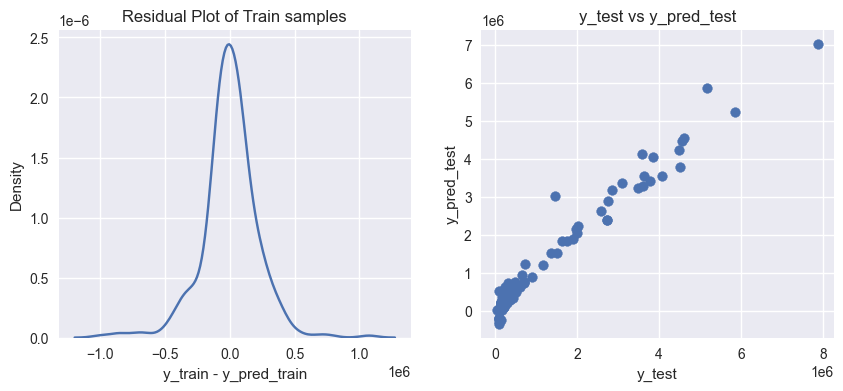

Mean Absolute Error: 199892.49994601824
Mean Squared Error: 93517744890.09143
Root Mean Squared Error: 305806.71164984495
     Giá_Ban_Dau   Gia_Du_Doan
298     382000.0  3.867449e+05
39       84000.0 -2.066725e+05
335     268000.0  2.735361e+05
398    4510000.0  3.784654e+06
153    1989000.0  2.050202e+06
195    2593000.0  2.624295e+06
168    1509000.0  1.531034e+06
101    1746000.0  1.840669e+06
397      88000.0 -1.795020e+05
30      134000.0  2.243229e+05
72      134000.0  2.133780e+05
271     268000.0  2.509098e+05
140     319000.0  7.439232e+05
349     196000.0  5.060260e+05
362    3492000.0  3.249966e+06
55      191000.0  3.094443e+05
165    2843000.0  3.175287e+06
320     218000.0  1.647692e+05
287     268000.0  2.860445e+05
82      160000.0  2.364867e+04
77       54000.0  2.110117e+04
132     354000.0  3.897973e+05
248    4550000.0  4.475084e+06
117     899000.0  9.058987e+05
203    2745000.0  2.889304e+06
404    5178000.0  5.867949e+06
79      380000.0  6.431275e+05
441    145

In [54]:
# Khởi tạo mô hình Ridge Regression
ridge_reg = Ridge()
# Thiết lập các tham số cần tìm kiếm
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}

# Grid search với cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)

# In ra các tham số tốt nhất
print(f"Best parameters for Ridge Regression: {grid_search_ridge.best_params_}")

# Sử dụng mô hình tốt nhất để dự đoán
best_ridge = grid_search_ridge.best_estimator_
y_pred_test = best_ridge.predict(X_test)
perfume_pred_model(ridge_reg, "ridge.pkl")
# Kiểm thử mô hình
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# So sánh giá ban đầu với giá mô hình dự đoán
comparison_df = pd.DataFrame({'Giá_Ban_Dau': y_test, 'Gia_Du_Doan': y_pred_test})
print(comparison_df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train R2-score: 1.0
Test R2-score: 0.97
Train CV scores: [0.98524741 0.99590369 0.9861     0.99472988 0.97877   ]
Train CV mean: 0.99


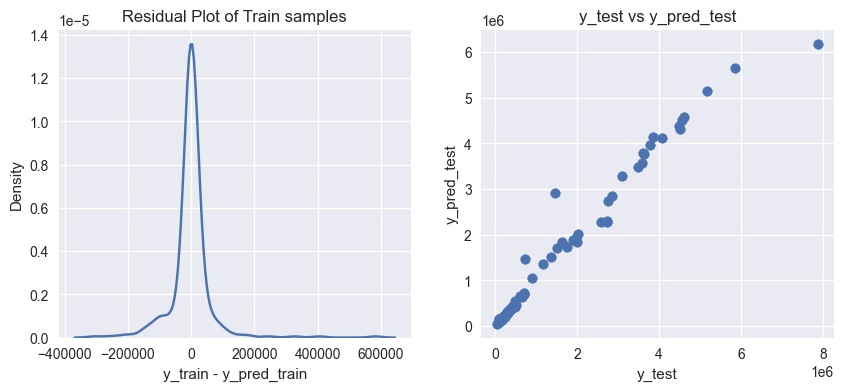

Mean Absolute Error: 199892.49994601824
Mean Squared Error: 93517744890.09143
Root Mean Squared Error: 305806.71164984495
     Giá_Ban_Dau   Gia_Du_Doan
298     382000.0  3.845293e+05
39       84000.0  8.624200e+04
335     268000.0  2.680658e+05
398    4510000.0  4.316873e+06
153    1989000.0  1.844041e+06
195    2593000.0  2.270280e+06
168    1509000.0  1.701518e+06
101    1746000.0  1.737780e+06
397      88000.0  8.813876e+04
30      134000.0  1.340821e+05
72      134000.0  1.338251e+05
271     268000.0  2.707561e+05
140     319000.0  2.923890e+05
349     196000.0  2.022861e+05
362    3492000.0  3.480885e+06
55      191000.0  1.897956e+05
165    2843000.0  2.852639e+06
320     218000.0  2.197852e+05
287     268000.0  2.680658e+05
82      160000.0  1.624307e+05
77       54000.0  5.400000e+04
132     354000.0  3.618010e+05
248    4550000.0  4.513046e+06
117     899000.0  1.062463e+06
203    2745000.0  2.745028e+06
404    5178000.0  5.140060e+06
79      380000.0  3.774135e+05
441    145

In [55]:
# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state=42)

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search với cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print(f"Best parameters: {grid_search.best_params_}")

# Sử dụng mô hình tốt nhất để dự đoán
best_rf = grid_search.best_estimator_
perfume_pred_model(best_rf, "RandomForest_regressor.pkl")

# Kiểm thử mô hình
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# So sánh giá ban đầu với giá mô hình dự đoán
y_pred_test = best_rf.predict(X_test)
comparison_df = pd.DataFrame({'Giá_Ban_Dau': y_test, 'Gia_Du_Doan': y_pred_test})
print(comparison_df)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Train R2-score: 1.0
Test R2-score: 0.98
Train CV scores: [0.98674081 0.99402934 0.99305557 0.99762451 0.98769034]
Train CV mean: 0.99


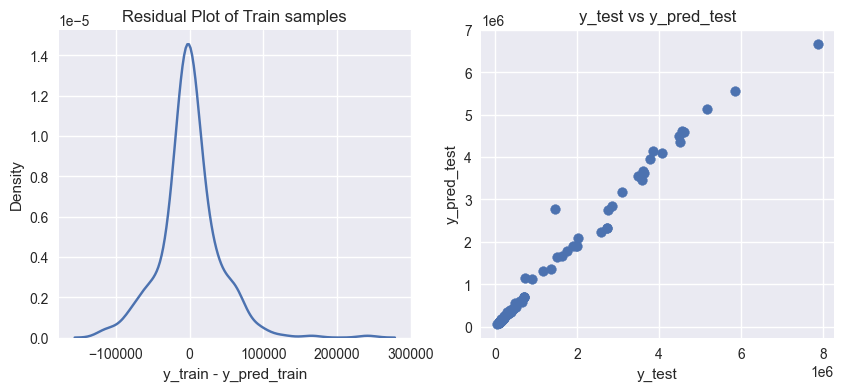

Mean Absolute Error: 64522.28467308034
Mean Squared Error: 30029287078.193874
Root Mean Squared Error: 173289.6046455005
     Giá_Ban_Dau   Gia_Du_Doan
298     382000.0  3.867722e+05
39       84000.0  7.632472e+04
335     268000.0  2.623102e+05
398    4510000.0  4.413333e+06
153    1989000.0  2.010421e+06
195    2593000.0  2.368497e+06
168    1509000.0  1.601855e+06
101    1746000.0  1.748107e+06
397      88000.0  6.028000e+04
30      134000.0  1.383565e+05
72      134000.0  1.383565e+05
271     268000.0  2.623102e+05
140     319000.0  3.141004e+05
349     196000.0  1.990186e+05
362    3492000.0  3.549852e+06
55      191000.0  2.006007e+05
165    2843000.0  2.797043e+06
320     218000.0  2.352045e+05
287     268000.0  2.623102e+05
82      160000.0  1.838620e+05
77       54000.0  5.361926e+04
132     354000.0  3.471626e+05
248    4550000.0  4.653300e+06
117     899000.0  1.114054e+06
203    2745000.0  2.738579e+06
404    5178000.0  5.156914e+06
79      380000.0  3.568074e+05
441    1452

In [56]:
# Khởi tạo mô hình Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
# Thiết lập các tham số cần tìm kiếm
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search với cross-validation
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=2)
grid_search_gbr.fit(X_train, y_train)

# In ra các tham số tốt nhất
print(f"Best parameters for Gradient Boosting Regressor: {grid_search_gbr.best_params_}")

# Sử dụng mô hình tốt nhất để dự đoán
best_gbr = grid_search_gbr.best_estimator_
y_pred_test = best_gbr.predict(X_test)
perfume_pred_model(gbr, "gbr.pkl")
# Kiểm thử mô hình
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# So sánh giá ban đầu với giá mô hình dự đoán
comparison_df = pd.DataFrame({'Giá_Ban_Dau': y_test, 'Gia_Du_Doan': y_pred_test})
print(comparison_df)

In [57]:
# Tổng hợp kết quả
Technique = ["Linear Regression", "Ridge Regression", "Random Forest", "Gradient Boosting"]
results = pd.DataFrame({
    'Model': Technique,
    'R Squared(Train)': R2_train,
    'R Squared(Test)': R2_test,
    'CV score mean(Train)': CV
})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,Linear Regression,0.99,0.95,0.96
1,Ridge Regression,0.98,0.96,0.97
2,Random Forest,1.00,0.97,0.99
3,Gradient Boosting,1.00,0.98,0.99
